### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! 
1. Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.
2. Для каждого нелинейного, где есть указанные проблемы, надо привести демонстрацию решения вашим методом. Без этой демонстрации считается, что обработчик соответствующей проблемы не реализован и не оценивается.

In [1]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        #print(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def cool_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(100):
        iteration += 1        
        fx = func(x)

        # 1) Нулевая производная
        ## Масштаб для конечных разностей
        eps = np.finfo(float).eps # машинный эпсилон
        h   = np.sqrt(eps) * max(1.0, abs(x)) 
        ## Защита от нулевой/малой производной — оценка центральной разностью
        dfx = dfunc(x)
        if not np.isfinite(dfx) or abs(dfx) < 1e-14:
            fph = func(x + h)
            fmh = func(x - h)
            dfx = (fph - fmh) / (2*h)
            if abs(dfx) < 1e-14 or not np.isfinite(dfx):
                ## Минимальный сдвиг для точки, чтобы покинуть «плоскую» точку
                x = x + h
                dxs.append(abs(h))
                if abs(h) < tol:
                    sol = x
                    return [sol, iteration, dxs]
                continue

        dx = -fx/dfx

        dxs.append(abs(dx))
        x = x + dx
        #print(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 100 iterations!')
    return [sol, iteration]

# Нулевая производная

Оценка центральной разностью:

$f'(x) = \frac{f(x+h) - f(x)}{h}$

Ошибка:

$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{1}{2}f''(x)h + o(h^2)$

$E(h) \approx E_{trunc}(h) + E_{round}(h) = ah + \frac{b\cdot \varepsilon}{h}$

Минимизация ошибки:

$E'(h) = a - \frac{b\varepsilon}{h^2}= 0$ 

$h_{min} = \sqrt{\frac{b}{a}}\cdot \sqrt{\varepsilon} \Rightarrow h_{min} \propto \sqrt{\varepsilon}$

Масштабирование ошибки:
$h = \sqrt{\varepsilon} \cdot max(1, |x|)$

Если после оценки, остается 0, то берем сдвиг на $x = x + h$ по начальному приближению и повторяем пока не выйдем с плоской точки.

#### Нелинейное уравнение 1

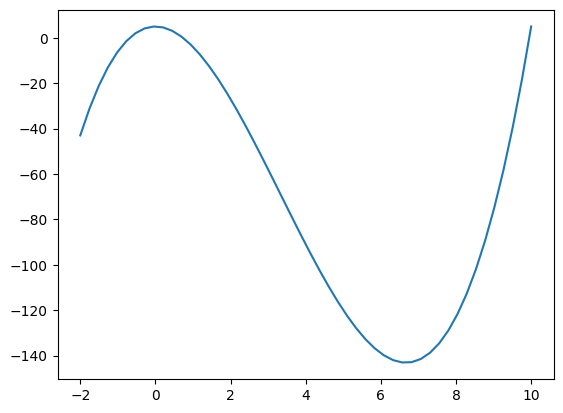

In [3]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

In [4]:
data = simple_newton(func0, dfunc0, 8) # случай 1
print('sol = ', data[0])
print('iter = ', data[1])
#data = simple_newton(func0, dfunc0, 0.7) # случай 2
#data = simple_newton(func0, dfunc0, 0.0) # случай 3
#print('sol = ', data[0])
#print('iter = ', data[1])

data1 = cool_newton(func0, dfunc0, 8) # случай 1
print('sol = ', data1[0])
print('iter = ', data1[1])
dxs8 = data1[2]
data1 = cool_newton(func0, dfunc0, 0.7) # случай 2
data1 = cool_newton(func0, dfunc0, 0.0) # случай 3
dxs0 = data1[2]
print('sol = ', data1[0])
print('iter = ', data1[1])


sol =  9.949491057914388
iter =  7
sol =  9.949491057914388
iter =  7
sol =  -0.6840945657036894
iter =  51


# Объяснение

$f(x) = x^3 - 10x^2 + 5, f'(x) = 3x^2 - 20x$

Точки:

$f'(x) = 0, x \in \{0, \frac{20}{3}\}$

Корни:

$\alpha_1 \approx -0.684, \alpha_2 \approx 0.735, \alpha_3 \approx 9.949$

Метод Ньютона сходится к тому корню, в чью меньшую окрестность(макс./мин.) попало начальное приближение $x$.

## Случай 1:

Точка находится правее минимума $\frac{20}{3}$. Здесь $f$ возросла и уходит в $\infty$ поэтому касательные идут вправо в окр. правого корня $\alpha_3$. Итерации устойчивы и дают квадратичную сходимость к $\alpha_3$

## Случай 2:

Точка лежит между максимумом $x = 0$ и минимумом $\frac{20}{3}$ где функция убывает от 5 до -143. Это окрестность корня $\alpha_2$. Касательные направляют к ближайшему нулю слева, и метод опять сходится квадратично, но уже к другому корню.

## Случай 3:

$f(0) = 5, f'(0) = 0$ 
Формула шага Ньютона требует делить на $f'(0)$ поэтому возникает ZeroDivisionError - деление на 0.

Касательная там горизонтальна и не пересекает ось x (на бесконечности), потому классический шаг не определён.

# График порядка сходимости

$p_k = \frac{ln(\frac{|\Delta x_{k+1}|}{|\Delta x_{k}|})}{ln(\frac{|\Delta x_{k}|}{|\Delta x_{k-1}|})}$

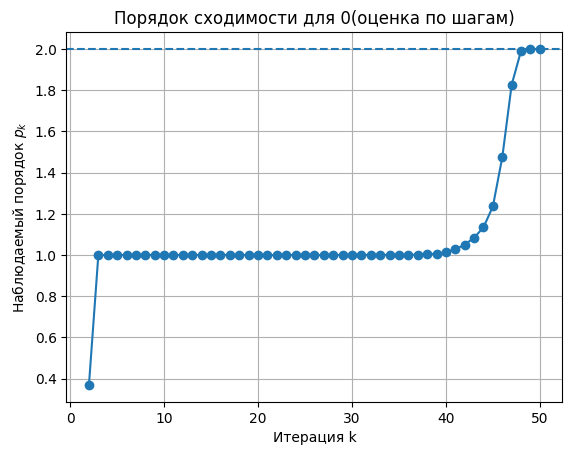

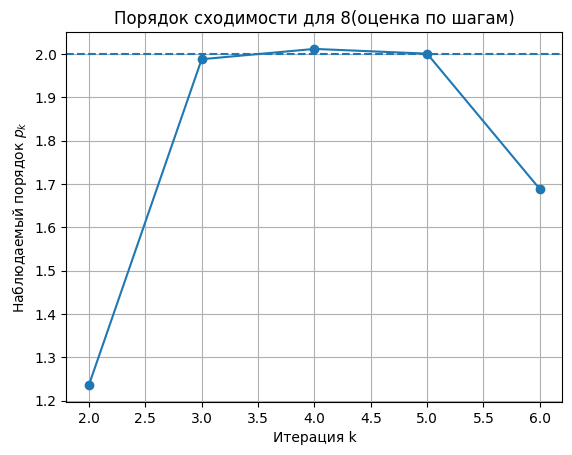

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def observed_order_from_dxs(dxs):
    """Оценка порядка p_k по шагам. Возвращает индексы и p_k."""
    dxs = np.asarray(dxs, dtype=float)
    its, pks = [], []
    for k in range(2, len(dxs)):
        if dxs[k-1] == 0 or dxs[k-2] == 0:
            continue
        pk = np.log(dxs[k]/dxs[k-1]) / np.log(dxs[k-1]/dxs[k-2])
        its.append(k)   # соответствует шагу dx_k
        pks.append(pk)
    return np.array(its), np.array(pks)

# График для 0
its, pks = observed_order_from_dxs(dxs0)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости для 0(оценка по шагам)")
plt.grid(True)
plt.show()
# График для 8
its, pks = observed_order_from_dxs(dxs8)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости для 8(оценка по шагам)")
plt.grid(True)
plt.show()

# Объяснение графика для 0

В начале $f'(x)$ нулевая или крайне мала. Поэтому мы заменяем шаг Ньютона и вместо деления на прозводную смещаем на минимальный сдвиг $\Delta x_k = h, x = x + k$

Поэтому

$|\Delta x_{k+1}| \approx r\cdot |\Delta x_{k}|$ и тогда $p_k = \frac{ln(r)}{ln(r)} = 1$

При выходе спустя n итераций мы выходим с плоского участка и попадаем в нормальную окрестность корня $\alpha_2$

Итерация становится ньютоновской 

$|\Delta x_{k+1}| \approx C \cdot |\Delta x_{k}|^2$ и мы получаем в конце 2 порядок сходимости

# Объяснение графика для 8

Аналогично предыдущему, только часть с ньютоновской итерацией

#### Нелинейное уравнение 2

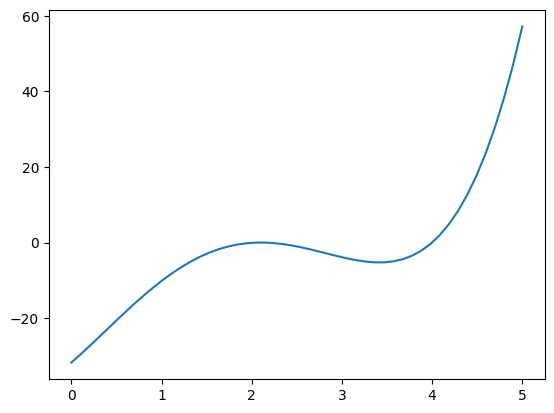

In [6]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

In [7]:
data = simple_newton(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.0999999786199406
iter =  23


#### Нелинейное уравнение 3

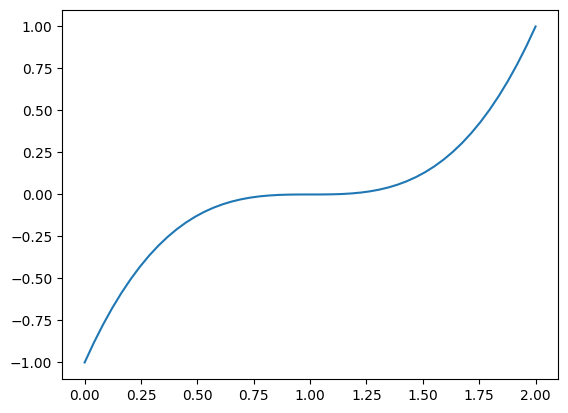

In [8]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [9]:
data = simple_newton(func2, dfunc2, 1.0000001)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0000000000017601
iter =  27


#### Нелинейное уравнение 4

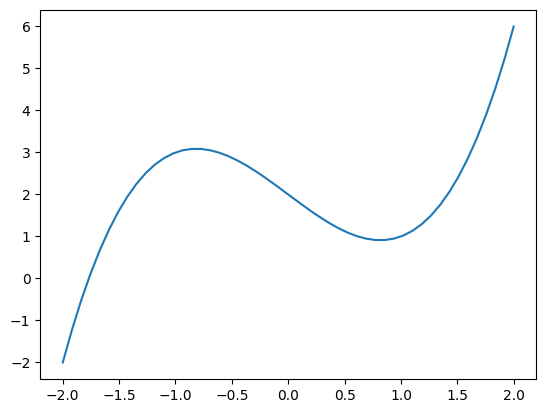

In [10]:
x = np.linspace(-2,2)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [11]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
#data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  10
